# Лабораторная работа №4

## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

Цель лабораторной работы: изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

from sklearn.model_selection import train_test_split

from operator import itemgetter

## Выберите набор данных (датасет) для решения задачи классификации или регрессии.

Используем данные информации о дневной температуре в крупных городах

In [7]:
# Будем использовать только обучающую выборку
data = pd.read_csv('city_temperature.csv', sep=",")

In [8]:
# размер набора данных
data.shape

(2906327, 8)

In [9]:
# типы колонок
data.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [10]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [11]:
# Первые 5 строк датасета
data.head()

Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

In [12]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2906327


In [13]:
data["Region"].unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [14]:
data.loc[data['Region'] == 'Africa', 'Region'] = 0
data.loc[data['Region'] == 'Asia', 'Region'] = 1
data.loc[data['Region'] == 'Australia/South Pacific', 'Region'] = 2
data.loc[data['Region'] == 'Europe', 'Region'] = 3
data.loc[data['Region'] == 'Middle East', 'Region'] = 4
data.loc[data['Region'] == 'North America', 'Region'] = 5
data.loc[data['Region'] == 'South/Central America & Carribean', 'Region'] = 6

In [15]:
data["Region"].unique()

array([0, 1, 2, 3, 4, 5, 6])

## Добавим целевой признак в отдельный вектор

In [16]:
data.head()

Region  Country State     City  Month  Day  Year  AvgTemperature
0       0  Algeria   NaN  Algiers      1    1  1995            64.2
1       0  Algeria   NaN  Algiers      1    2  1995            49.4
2       0  Algeria   NaN  Algiers      1    3  1995            48.8
3       0  Algeria   NaN  Algiers      1    4  1995            46.4
4       0  Algeria   NaN  Algiers      1    5  1995            47.9

In [17]:
del data['Country']
del data['State']
del data['City']
del data['Day']
del data['Year']

In [18]:
data.rename(columns={'Region': 'x1', 'Month': 'x2','AvgTemperature': 'y'}, inplace=True)

In [19]:
data.head()

x1  x2     y
0   0   1  64.2
1   0   1  49.4
2   0   1  48.8
3   0   1  46.4
4   0   1  47.9

## С использованием метода train_test_split разделите выборку на обучающую и тестовую.


In [20]:
data_train, data_test = train_test_split(data)

In [21]:
data_train.head()

x1  x2     y
1896846   5   7  80.3
2868832   5   5  65.8
143834    0   1 -99.0
626433    3   5  72.8
227779    0  12  82.2

In [22]:
data_test.head()

x1  x2     y
2620925   5   7  83.0
593912    2  10  63.4
1829755   5  10  39.8
2245921   5  11  35.5
2338796   5   6  73.2

In [23]:
data_train.shape[0]

2179745

In [24]:
data_test.shape[0]

726582

In [25]:
data_train = data.head(1000)

In [26]:
data_test = data.tail(50)

In [27]:
data_train.head()

x1  x2     y
0   0   1  64.2
1   0   1  49.4
2   0   1  48.8
3   0   1  46.4
4   0   1  47.9

In [28]:
data_test.head()

x1  x2     y
2906277   5   6  79.9
2906278   5   6  81.8
2906279   5   6  82.7
2906280   5   6  83.2
2906281   5   6  82.7

### Разделение прошло успешно

## Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.

In [29]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [30]:
class SimpleKNN:
    
    def fit(self, X_train: np.matrix, y_train: np.ndarray):
        """
        Метод обучения, который фактически не учится, 
        а только запоминает обучающую выборку.
        Входные параметры:
        X_train - обучающая выборка (матрица объект-признак)
        y_train - обучающая выборка (вектор целевого признака)
        Возвращаемое значение: нет
        """
        #Сохраняем параметры в переменных класса
        self._X_train = X_train
        self._y_train = y_train
          
    def eucl_dist(self, p: np.ndarray, q: np.ndarray) -> float:
        """
        Вычисление Евклидова расстояния - https://en.wikipedia.org/wiki/Euclidean_distance 
        Входные параметры:
        p, q - вектора в n-мерном пространстве признаков
        """
        return sum([(pi - qi) ** 2 for pi, qi in zip (p, q)])
            
            
    def predict_for_single_object(self, K: int, \
                prediction_type: PredictionType, \
                X_o: np.ndarray, \
                verbose = True) -> np.ndarray:
        """
        Метод предсказания для одного объекта.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_o - строка матрицы объект-признак, соответствующая объекту
        verbose - флаг детального вывода
        Возвращаемое значение: предсказанное значение целевого признака
        """
        # список соседей
        neighbors_list = []
        # *** Находим ближайшие точки ***
        # Перебираем все точки обучающей выборки
        for i in range(self._X_train.shape[0]):
            # получаем текущую точку
            data_train_current_x = [x for x in self._X_train[['x1','x2']].iloc[i]]
            # и значение ее y
            data_train_current_y = self._y_train[i]
            # вычисляем расстояние
            dist = self.eucl_dist(X_o, data_train_current_x)
            # сохраняем в список соседей
            temp_res = (data_train_current_y, dist, data_train_current_x)
            neighbors_list.append(temp_res)
        # *** сортируем список соседей по возрастанию расстояния *** 
        # в кортеже элементы следуют в порядке (0,1,2), сортируем по первому элементу 
        neighbors_list_sorted = sorted(neighbors_list, key=itemgetter(1))
        if verbose:
            print()
            print('**************************************')
            print('Проверяемая точка: ', X_o)
            print('**************************************')
            print('Вывод отсортированного списка соседей:')    
            dist_list = []
            for cur_y, cur_dist, _ in neighbors_list_sorted:
                print('y={0}, расстояние={1:.2f}'.format(cur_y, cur_dist))
                dist_list.append(cur_dist)
            print()
            print('Вывод расстояния для отсортированного списка соседей:')    
            plt.plot(dist_list)
            plt.show()
        # Оставим только K ближайших соседей
        K_neighbors_list_sorted = neighbors_list_sorted[:K]
        if verbose:
            print('Вывод К ближайших соседей:')
            x1_list = []
            x2_list = []
            for cur_y, cur_dist, temp_x_1_2 in K_neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                x1_list.append(temp_x1)
                x2_list.append(temp_x2)
                print('y={0}, расстояние={1:.2f}'.format(cur_y, cur_dist))
            print()
            print('Визуализация К ближайших соседей:')
            plt.plot(self._X_train['x1'], self._X_train['x2'], 'b.', \
                     x1_list, x2_list,  'g*', \
                    [X_o[0]], [X_o[1]], 'ro')
            plt.show()   
        # Результат - классификация или регрессия
        if prediction_type == PredictionType.REGRESSION:
            # используем numpy для вычисления среднего значения
            arr = np.array([x for x,_,_ in K_neighbors_list_sorted])
            # возвращаем среднее значение
            return np.mean(arr)          
        elif prediction_type == PredictionType.CLASSIFICATION:
            k_y_list = [y for y,_,_ in K_neighbors_list_sorted]
            # группируем с количеством метки классов,
            # соответствующие K ближайшим соседям
            k_y_list_grouped_temp = np.unique(k_y_list, return_counts=True)
            k_y_list_grouped = [[key, cnt] for key, cnt in zip(k_y_list_grouped_temp[0], k_y_list_grouped_temp[1])]
            # сортируем по количеству по убыванию
            k_y_list_grouped_sorted = sorted(k_y_list_grouped, key=itemgetter(1), reverse=True)
            if verbose:
                print('Классы, соответствующие К ближайшим соседям:')
                for i in k_y_list_grouped_sorted:
                    print('класс={0}, количество элементов={1}'.format(i[0], i[1]))
            # возвращаеv метку класса из первой строки отсортированного массива
            # то есть того класса, к которому принадлежит наибольшее количество соседей
            return k_y_list_grouped_sorted[0][0]
        else:
            raise Exception('Неизвестный тип предсказания')
                   
    
    def predict(self, K: int, \
                prediction_type: PredictionType, \
                X_test: np.matrix, 
                verbose = True) -> np.ndarray:
        """
        Метод предсказания.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_test - тестовая выборка (матрица объект-признак)
        Возвращаемое значение: предсказанный вектор целевого признака
        """
        # Перебираем все точки тестовой выборки
        test_data_temp = []
        for i in range(X_test.shape[0]):
            # получаем текущую точку
            data_test_current_x = [x for x in X_test.iloc[i]]
            test_data_temp.append(data_test_current_x)       
        return [self.predict_for_single_object(K=K, \
                prediction_type=prediction_type, \
                X_o=i, verbose=verbose) for i in test_data_temp]
    

In [31]:
simple_knn_regr = SimpleKNN()

In [32]:
simple_knn_regr.fit(data_train[['x1','x2']], data_train['y'])

In [33]:
data_train[['x1','x2']]

x1  x2
0     0   1
1     0   1
2     0   1
3     0   1
4     0   1
5     0   1
6     0   1
7     0   1
8     0   1
9     0   1
10    0   1
11    0   1
12    0   1
13    0   1
14    0   1
15    0   1
16    0   1
17    0   1
18    0   1
19    0   1
20    0   1
21    0   1
22    0   1
23    0   1
24    0   1
25    0   1
26    0   1
27    0   1
28    0   1
29    0   1
..   ..  ..
970   0   8
971   0   8
972   0   8
973   0   8
974   0   9
975   0   9
976   0   9
977   0   9
978   0   9
979   0   9
980   0   9
981   0   9
982   0   9
983   0   9
984   0   9
985   0   9
986   0   9
987   0   9
988   0   9
989   0   9
990   0   9
991   0   9
992   0   9
993   0   9
994   0   9
995   0   9
996   0   9
997   0   9
998   0   9
999   0   9

[1000 rows x 2 columns]

In [34]:
# вектор целевого признака
data_train['y']

0      64.2
1      49.4
2      48.8
3      46.4
4      47.9
5      48.7
6      48.9
7      49.1
8      49.0
9      51.9
10     51.7
11     51.3
12     47.0
13     46.9
14     47.5
15     45.9
16     44.5
17     50.7
18     54.0
19     52.6
20     54.2
21     51.0
22     53.5
23     54.2
24     54.2
25     52.6
26     55.5
27     53.8
28     54.3
29     57.4
       ... 
970    78.4
971    76.0
972    74.5
973    78.3
974    81.7
975    79.1
976    76.6
977    70.9
978    73.9
979    75.5
980    75.3
981    73.5
982    75.2
983    76.4
984    79.2
985    81.4
986    81.5
987    76.2
988    75.9
989    75.0
990    75.7
991    76.1
992    76.2
993    74.8
994    72.6
995    72.1
996    70.8
997    70.0
998    71.3
999    70.7
Name: y, Length: 1000, dtype: float64

In [35]:
# первая строка тестовой выборки
data_test_0 = [x for x in data_test[['x1','x2']].iloc[0]]
data_test_0

[5, 6]


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

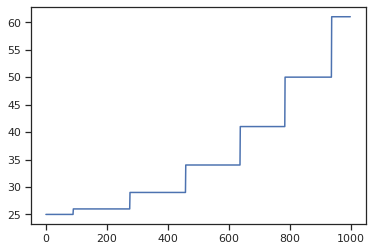

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


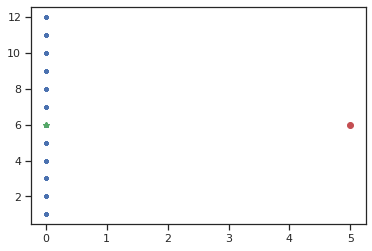

67.38000000000001

In [36]:
# построим предсказание для одного объекта (регрессия)
simple_knn_regr_0 = simple_knn_regr.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_o=data_test_0)
simple_knn_regr_0


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

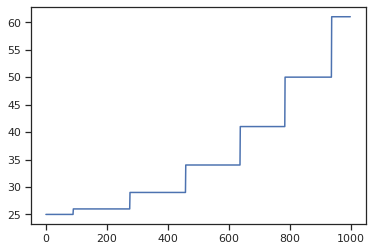

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


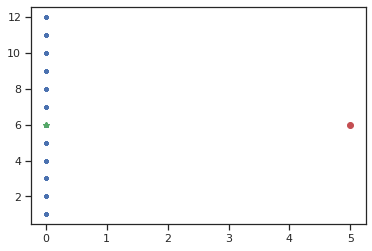


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

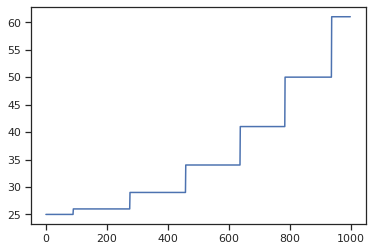

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


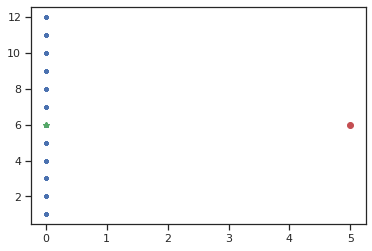


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

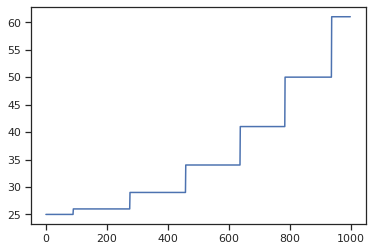

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


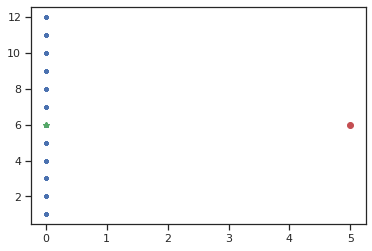


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

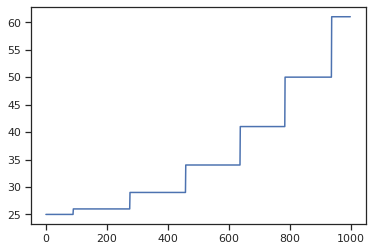

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


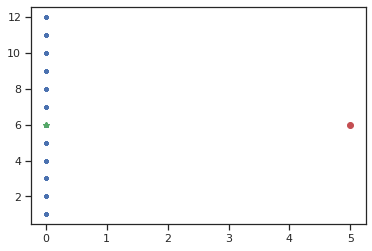


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

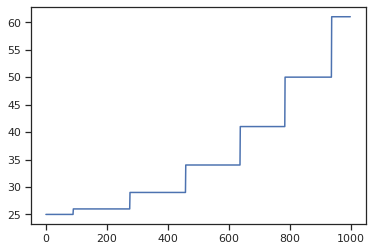

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


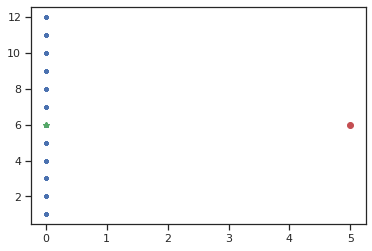


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

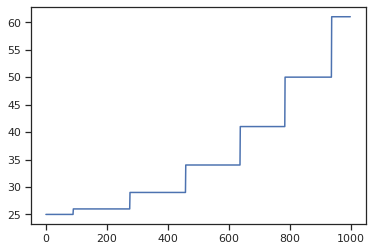

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


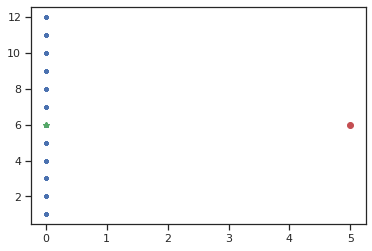


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

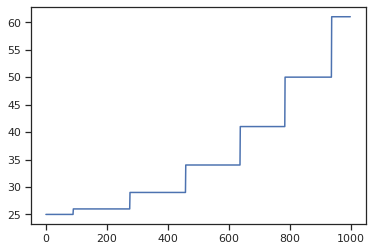

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


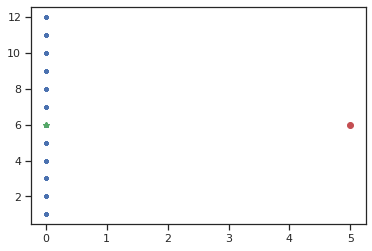


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

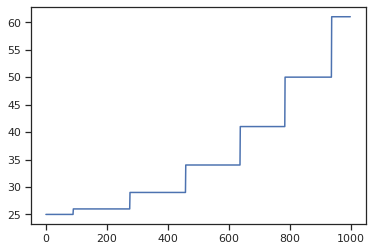

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


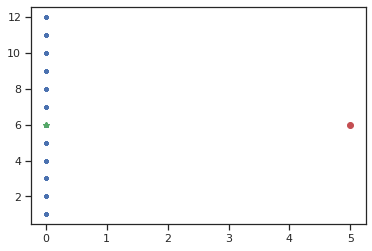


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

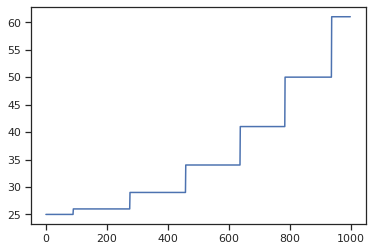

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


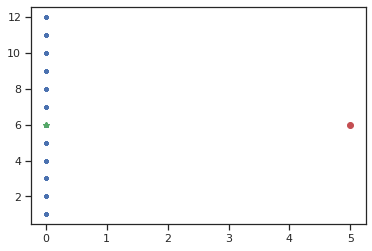


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

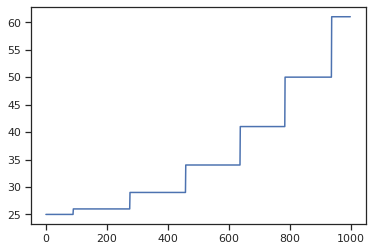

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


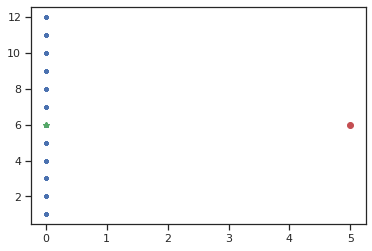


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

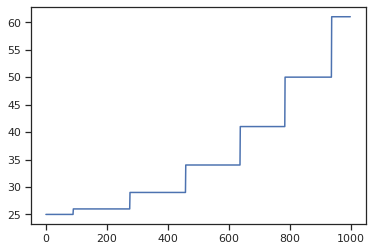

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


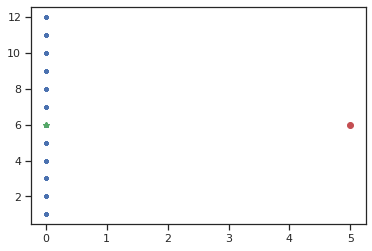


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

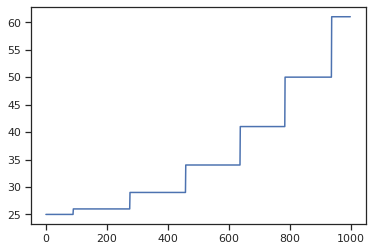

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


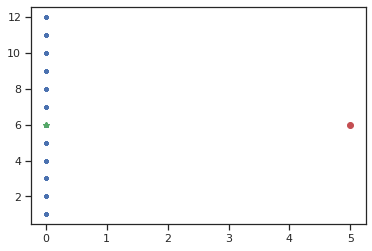


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

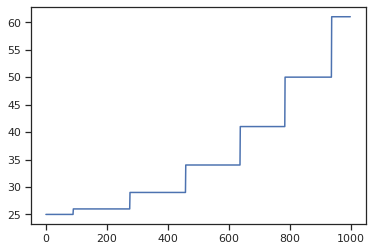

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


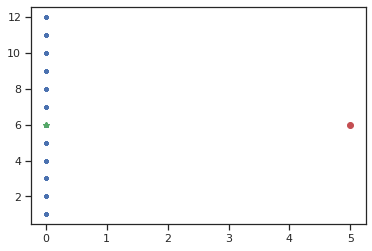


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

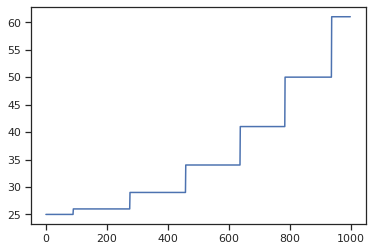

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


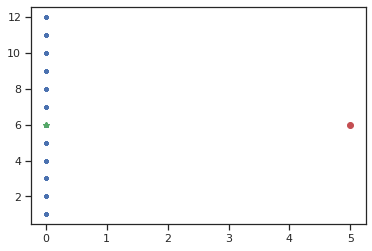


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

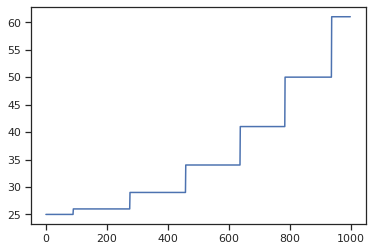

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


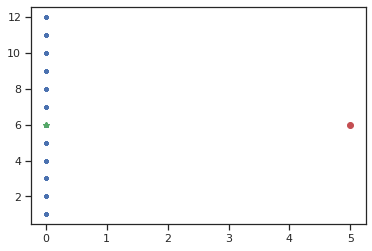


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

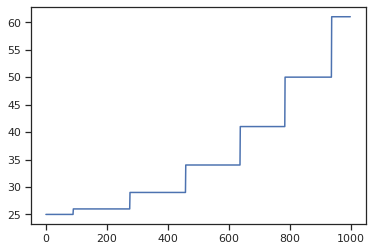

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


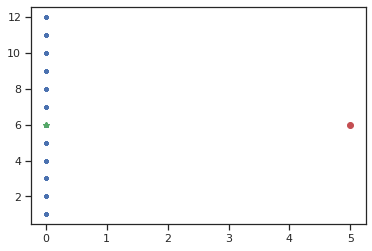


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

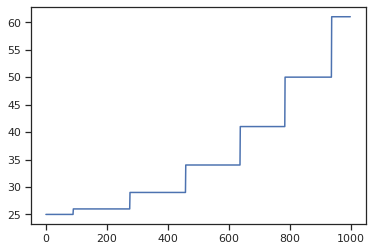

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


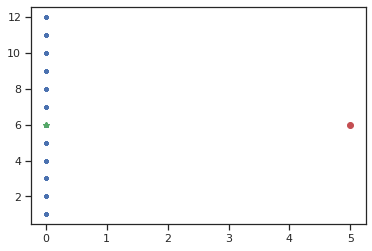


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

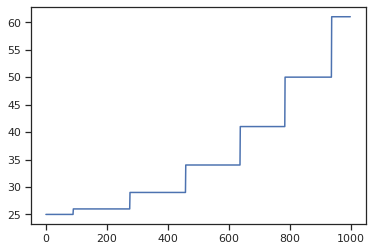

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


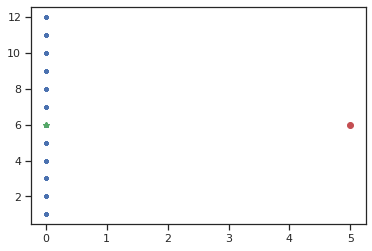


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00
y=70.4, расстояние=25.00
y=72.6, расстояние=25.00
y=70.6, расстояние=25.00
y=70.5, расстояние=25.00
y=69.1, расстояние=25.00
y=68.6, расстояние=25.00
y=70.3, расстояние=25.00
y=69.2, расстояние=25.00
y=69.2, расстояние=25.00
y=71.5, расстояние=25.00
y=71.4, расстояние=25.00
y=71.9, расстояние=25.00
y=70.0, расстояние=25.00
y=76.5, расстояние=25.00
y=73.4, расстояние=25.00
y=75.9, расстояние=25.00
y=74.5, расстояние=25.00
y=73.8, расстояние=25.00
y=72.8, расстояние=25.00
y=74.6, расстояние=25.00
y=75.8, расстояние=25.00
y=75.8, расстояние=25.00
y=75.1, расстояние=25.00
y=73.6, расстояние=25.00
y=77.7, расстояние=25.00
y=68.0, расстояние=25.00
y=67.1, расстояние=25.00
y=65.0, расстояние=25.00
y=63.8, расстояние=25.00
y=65.

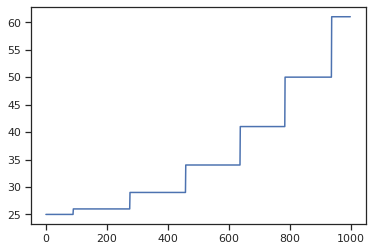

Вывод К ближайших соседей:
y=64.6, расстояние=25.00
y=66.7, расстояние=25.00
y=67.7, расстояние=25.00
y=68.6, расстояние=25.00
y=69.3, расстояние=25.00

Визуализация К ближайших соседей:


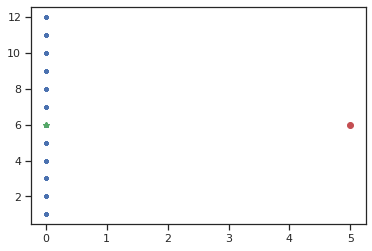


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

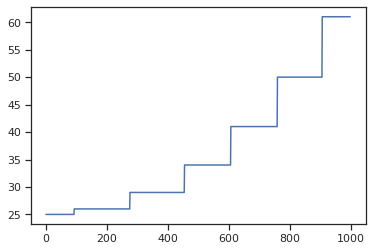

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


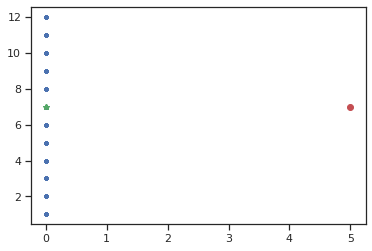


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

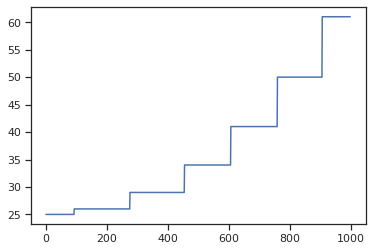

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


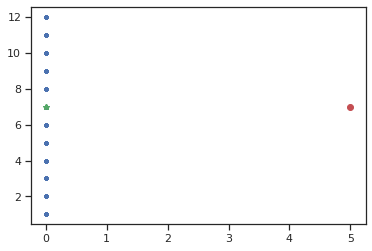


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

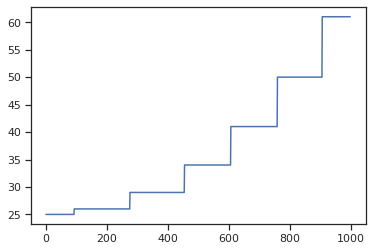

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


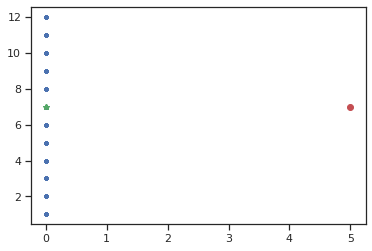


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

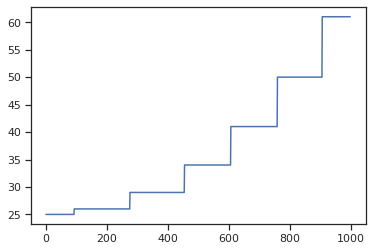

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


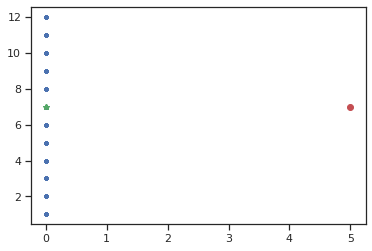


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

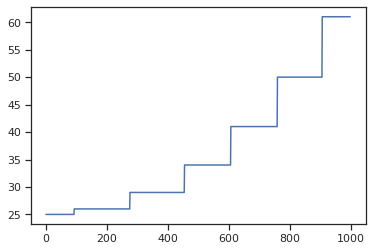

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


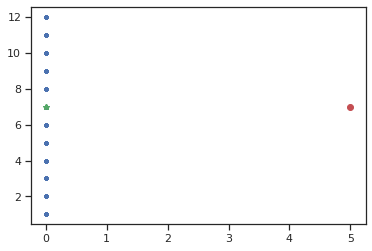


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

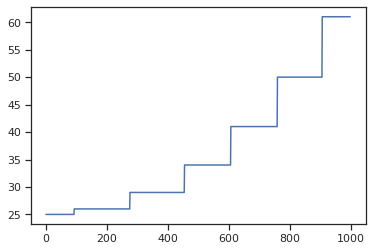

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


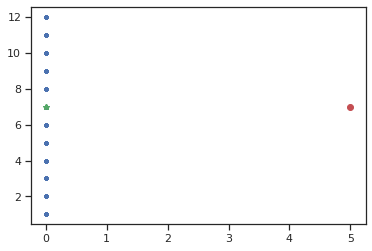


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

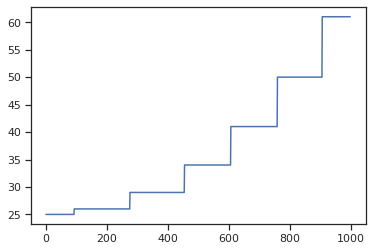

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


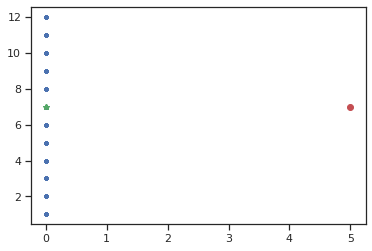


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

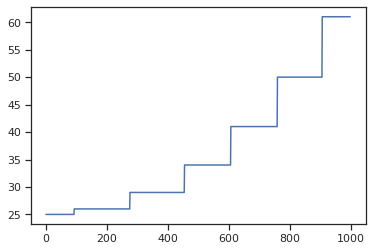

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


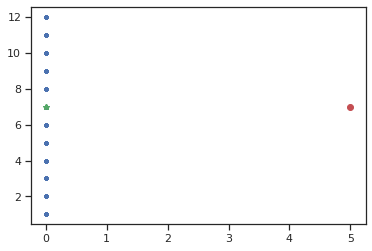


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

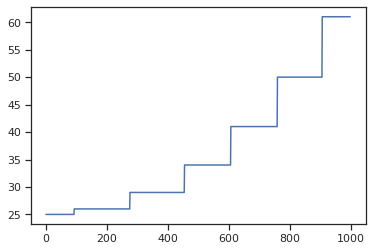

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


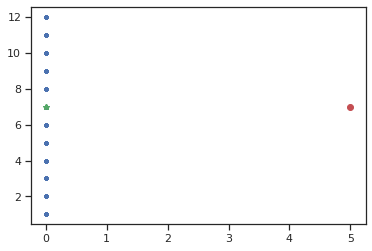


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

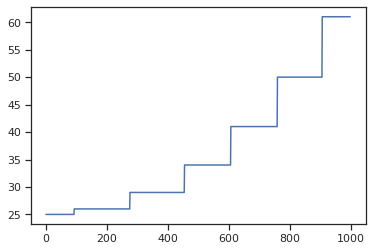

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


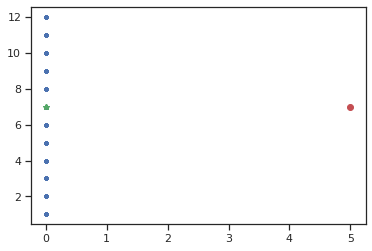


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

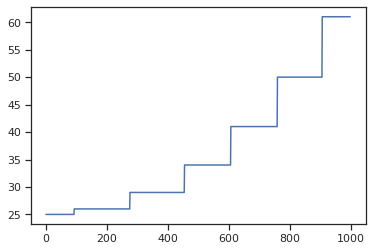

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


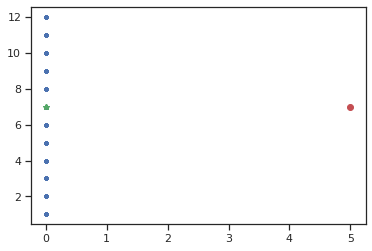


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

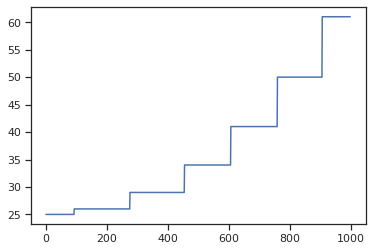

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


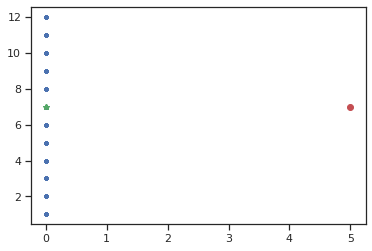


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

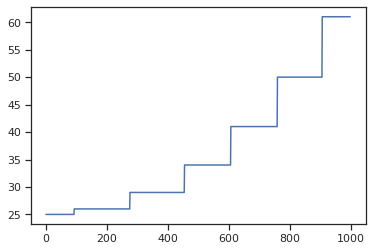

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


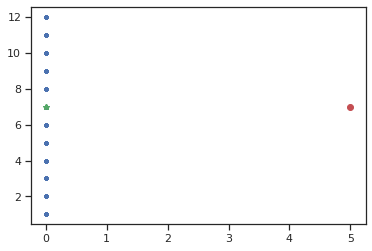


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

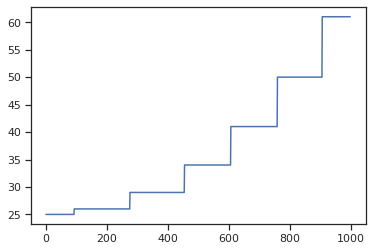

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


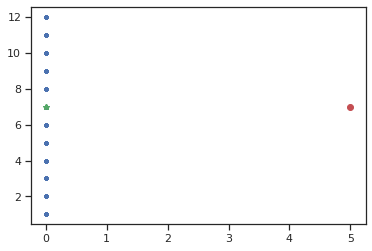


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

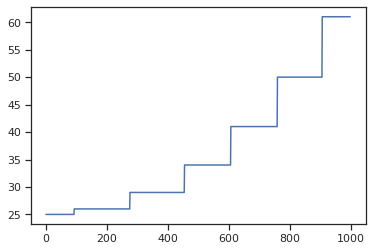

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


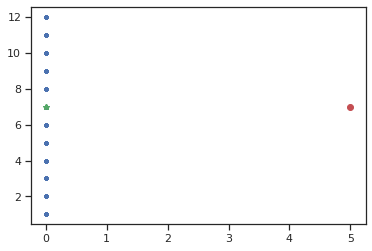


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

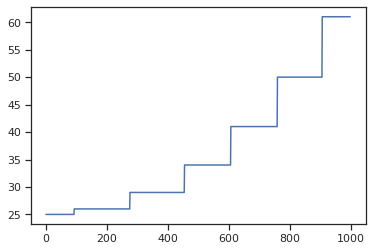

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


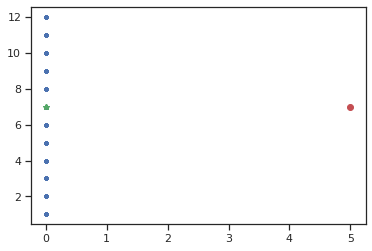


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

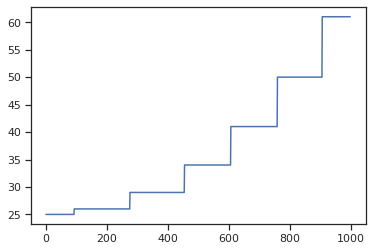

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


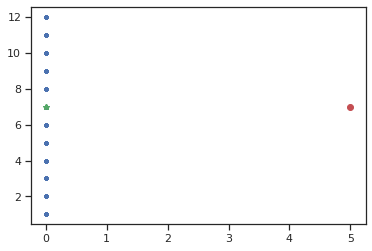


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

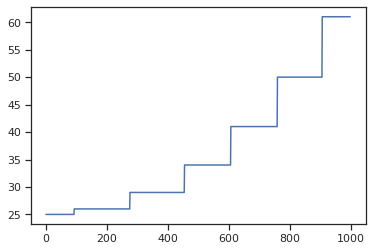

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


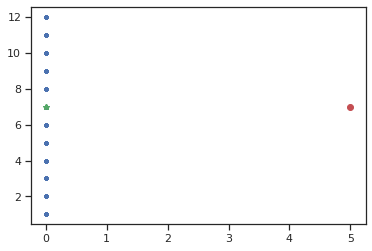


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

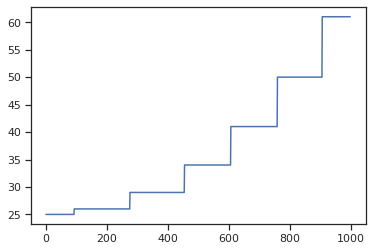

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


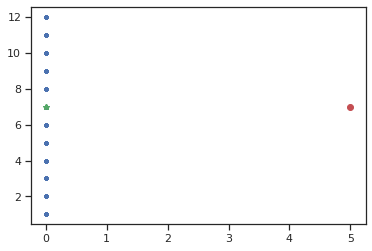


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

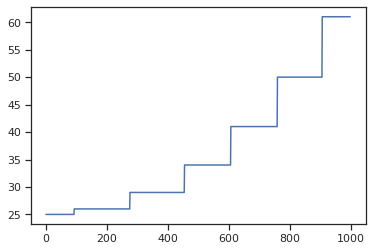

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


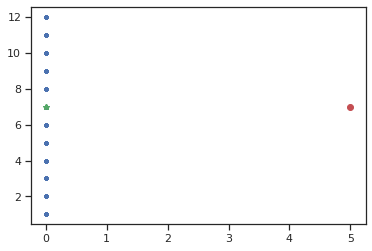


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

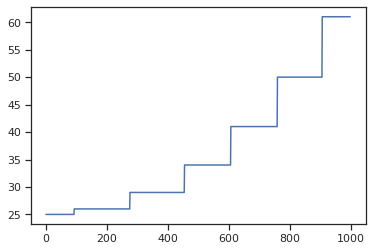

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


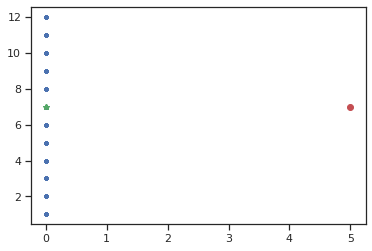


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

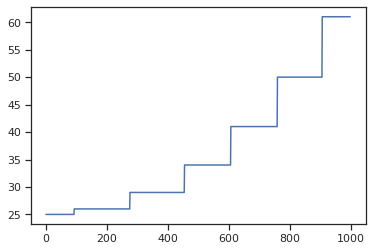

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


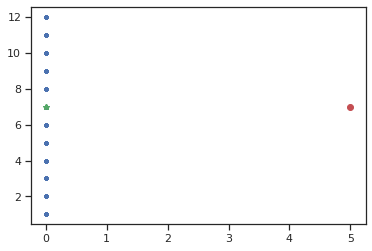


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

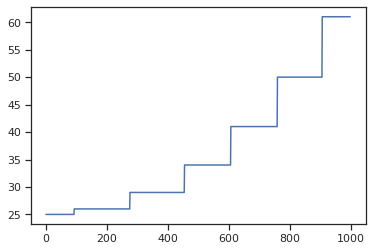

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


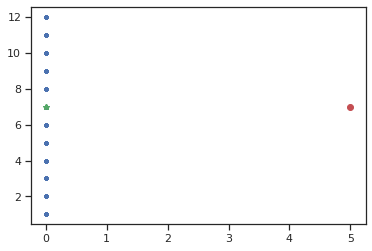


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

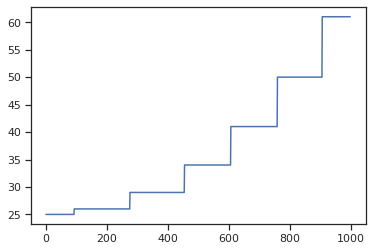

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


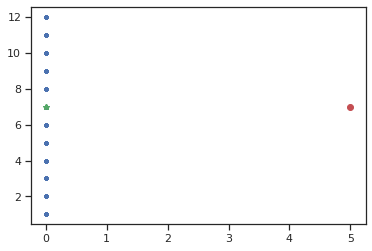


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

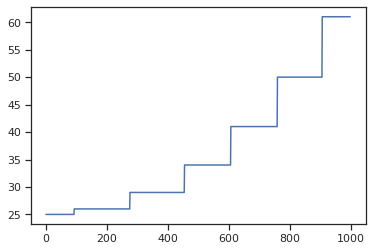

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


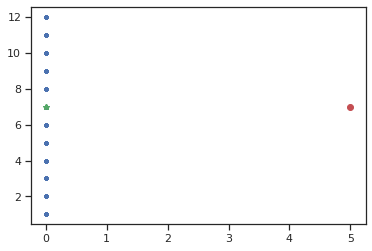


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

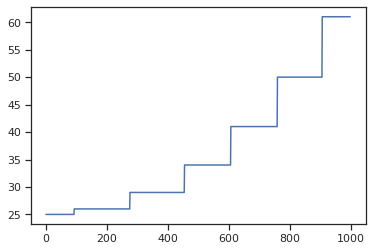

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


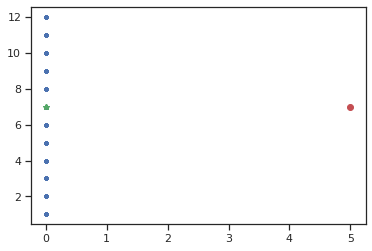


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

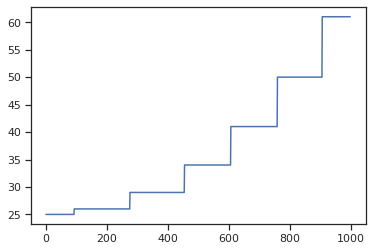

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


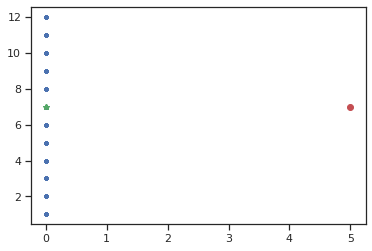


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

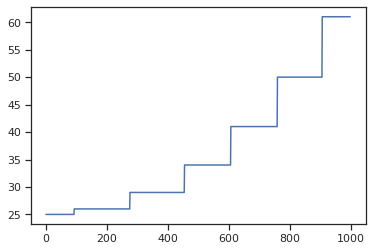

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


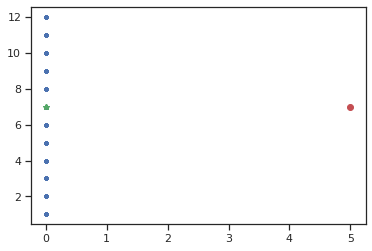


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

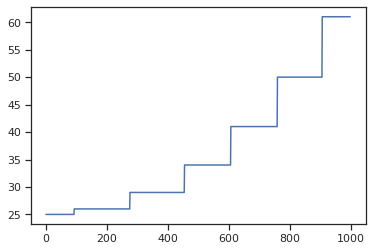

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


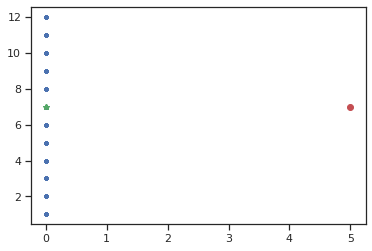


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

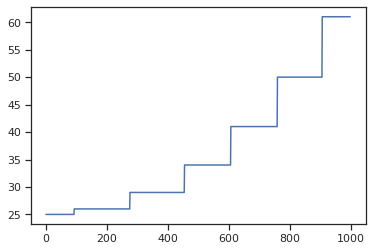

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


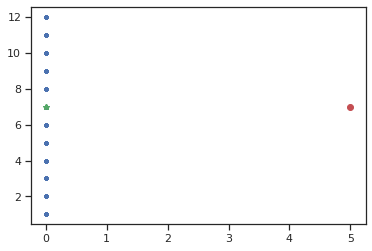


**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00
y=72.9, расстояние=25.00
y=74.1, расстояние=25.00
y=76.6, расстояние=25.00
y=75.9, расстояние=25.00
y=76.7, расстояние=25.00
y=76.1, расстояние=25.00
y=75.5, расстояние=25.00
y=74.6, расстояние=25.00
y=76.7, расстояние=25.00
y=76.5, расстояние=25.00
y=76.4, расстояние=25.00
y=76.6, расстояние=25.00
y=77.7, расстояние=25.00
y=78.3, расстояние=25.00
y=76.9, расстояние=25.00
y=83.4, расстояние=25.00
y=81.6, расстояние=25.00
y=77.2, расстояние=25.00
y=80.4, расстояние=25.00
y=79.3, расстояние=25.00
y=81.1, расстояние=25.00
y=80.7, расстояние=25.00
y=80.3, расстояние=25.00
y=79.4, расстояние=25.00
y=78.8, расстояние=25.00
y=79.7, расстояние=25.00
y=72.8, расстояние=25.00
y=77.4, расстояние=25.00
y=73.7, расстояние=25.00
y=74.

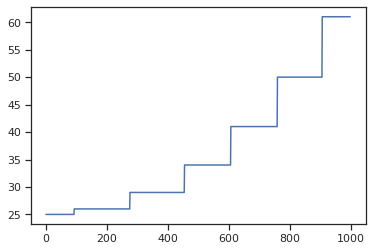

Вывод К ближайших соседей:
y=78.6, расстояние=25.00
y=77.4, расстояние=25.00
y=76.2, расстояние=25.00
y=73.0, расстояние=25.00
y=73.9, расстояние=25.00

Визуализация К ближайших соседей:


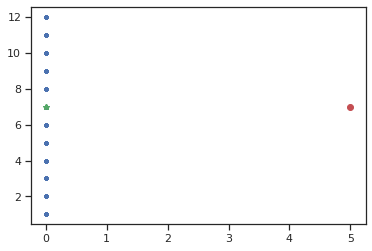

[67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 67.38000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001,
 75.82000000000001]

In [37]:
#Для всех объектов тестовой выборки (регрессия)
simple_knn_regr_prediction = simple_knn_regr.predict(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_test=data_test[['x1','x2']])
simple_knn_regr_prediction

In [38]:
# формирование второго целевого признака для классификации
def regr_to_class(y: float) -> str:
    if (y < 50 and y > 41):
        result = 'L'
    elif (y > 51 and y < 60):
        result = 'M'
    elif (y > 61 and y<70):
        result = 'C'
    else:
        result = 'N'        
    return result 

In [39]:
data_train['y_clas'] = \
data_train.apply(lambda row: regr_to_class(row['y']),axis=1)

/home/mark/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
data_train

x1  x2     y y_clas
0     0   1  64.2      C
1     0   1  49.4      L
2     0   1  48.8      L
3     0   1  46.4      L
4     0   1  47.9      L
5     0   1  48.7      L
6     0   1  48.9      L
7     0   1  49.1      L
8     0   1  49.0      L
9     0   1  51.9      M
10    0   1  51.7      M
11    0   1  51.3      M
12    0   1  47.0      L
13    0   1  46.9      L
14    0   1  47.5      L
15    0   1  45.9      L
16    0   1  44.5      L
17    0   1  50.7      N
18    0   1  54.0      M
19    0   1  52.6      M
20    0   1  54.2      M
21    0   1  51.0      N
22    0   1  53.5      M
23    0   1  54.2      M
24    0   1  54.2      M
25    0   1  52.6      M
26    0   1  55.5      M
27    0   1  53.8      M
28    0   1  54.3      M
29    0   1  57.4      M
..   ..  ..   ...    ...
970   0   8  78.4      N
971   0   8  76.0      N
972   0   8  74.5      N
973   0   8  78.3      N
974   0   9  81.7      N
975   0   9  79.1      N
976   0   9  76.6      N
977   0   9  70.9      N
978   0   9  73.9      N
979   0   9  75.5      N
980   0   9  75.3      N
981   0   9  73.5      N
982   0   9  75.2      N
983   0   9  76.4      N
984   0   9  79.2      N
985   0   9  81.4      N
986   0   9  81.5      N
987   0   9  76.2      N
988   0   9  75.9      N
989   0   9  75.0      N
990   0   9  75.7      N
991   0   9  76.1      N
992   0   9  76.2      N
993   0   9  74.8      N
994   0   9  72.6      N
995   0   9  72.1      N
996   0   9  70.8      N
997   0   9  70.0      N
998   0   9  71.3      N
999   0   9  70.7      N

[1000 rows x 4 columns]

In [41]:
data_train["y_clas"].unique()

array(['C', 'L', 'M', 'N'], dtype=object)

In [42]:
simple_knn_clas = SimpleKNN()

In [43]:
simple_knn_clas.fit(data_train[['x1','x2']], data_train['y_clas'])


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.

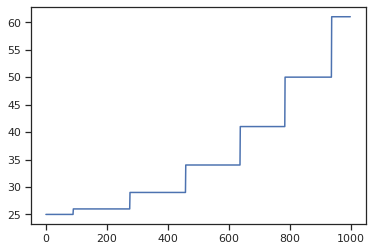

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


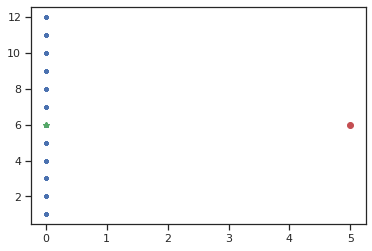

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=5


'C'

In [44]:
# построим предсказание для одного объекта (классификация)
simple_knn_clas_0 = simple_knn_clas.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_o=data_test_0)
simple_knn_clas_0


**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.

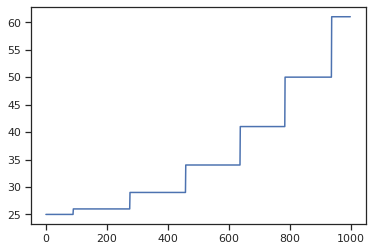

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


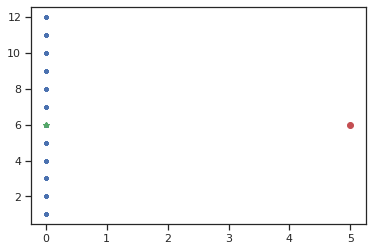

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

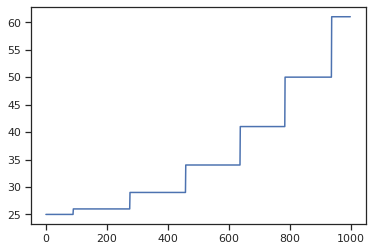

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


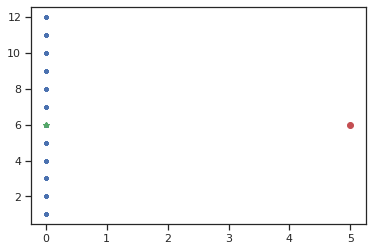

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

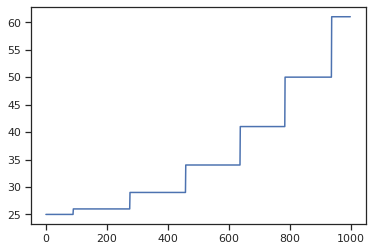

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


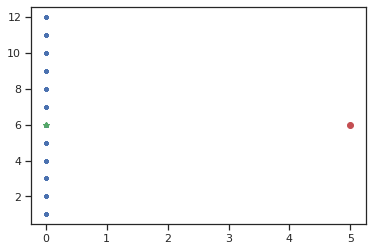

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

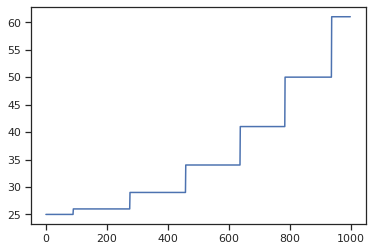

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


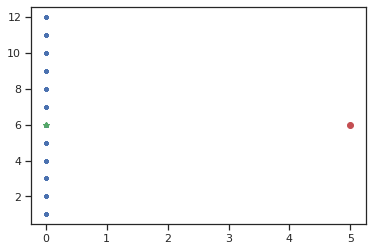

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

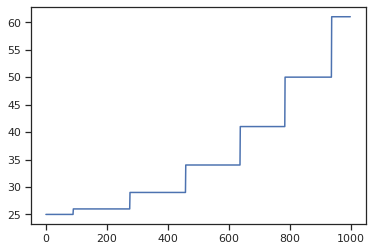

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


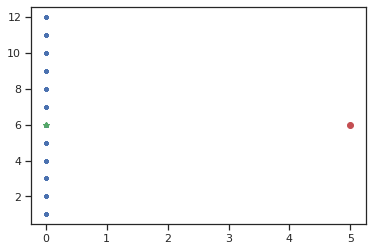

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

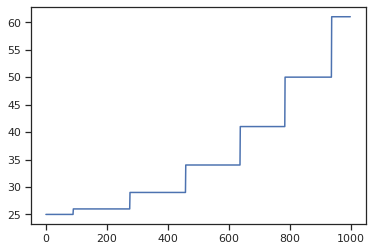

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


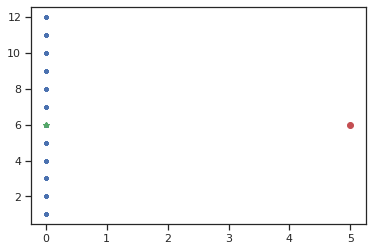

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

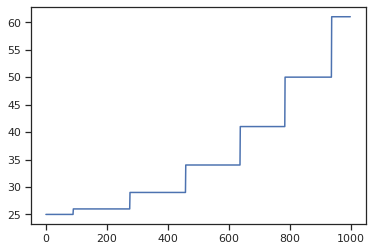

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


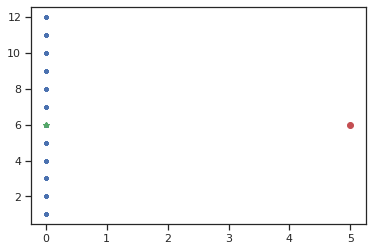

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

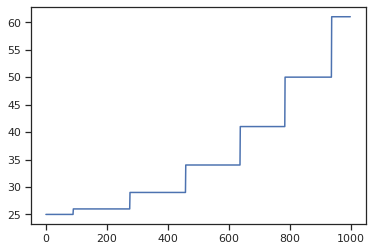

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


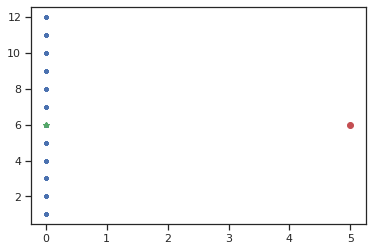

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

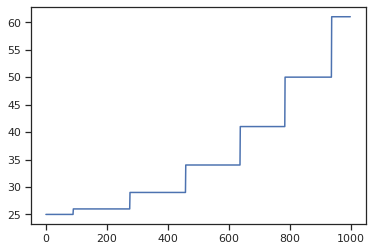

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


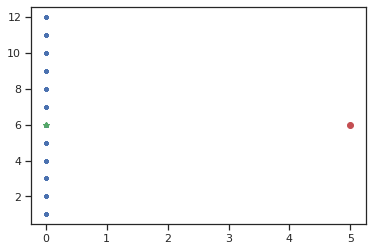

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

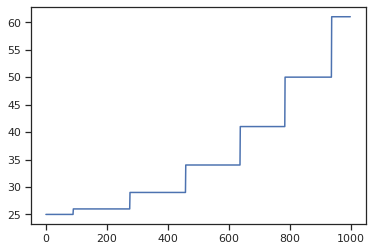

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


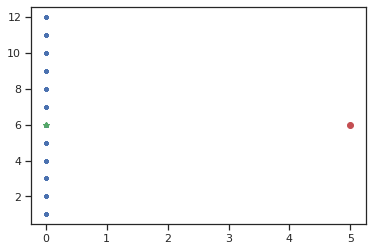

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

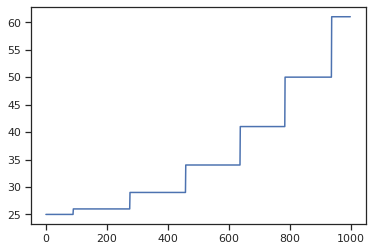

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


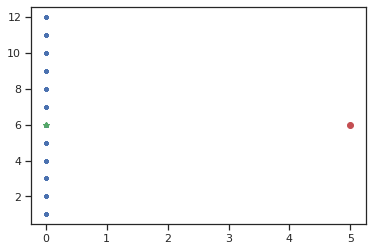

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

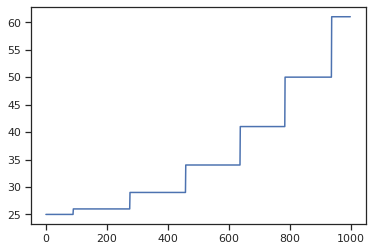

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


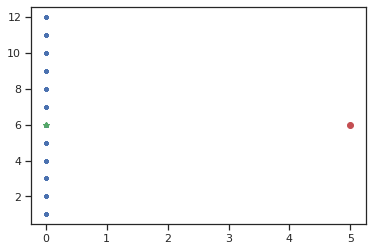

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

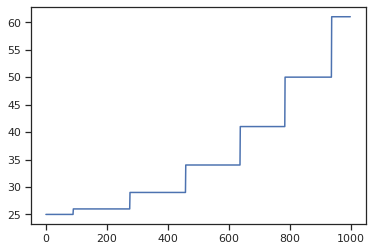

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


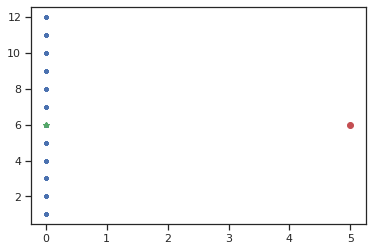

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

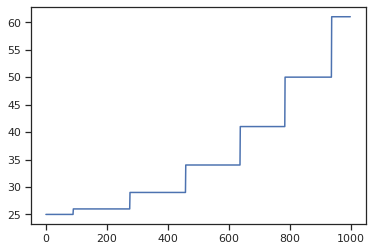

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


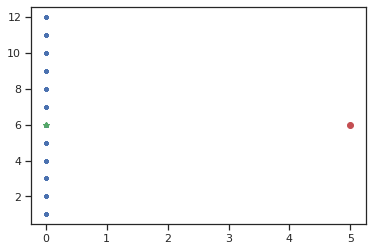

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

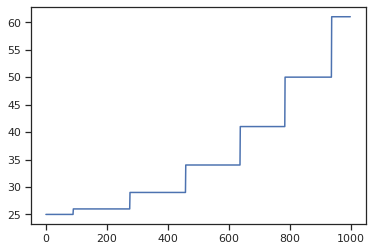

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


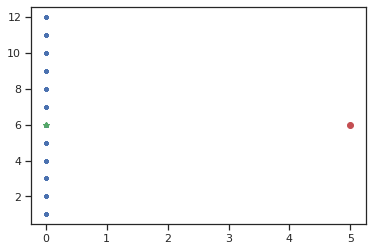

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

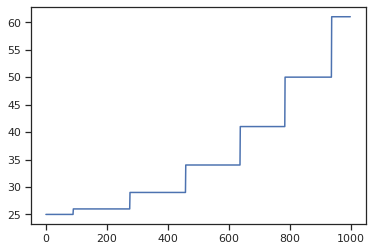

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


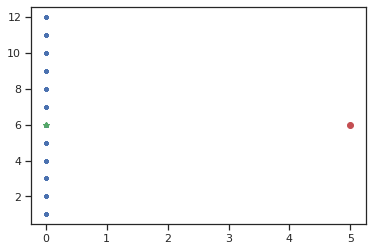

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

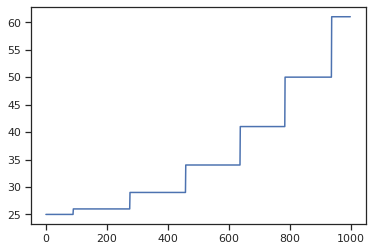

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


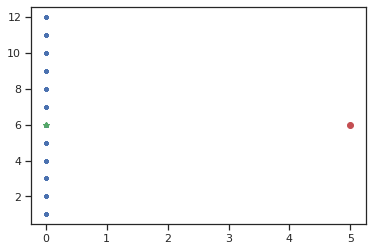

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

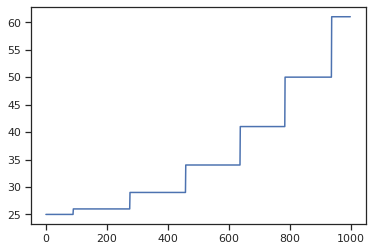

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


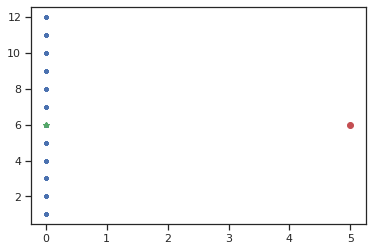

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 6]
**************************************
Вывод отсортированного списка соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, рас

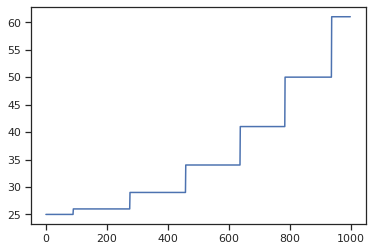

Вывод К ближайших соседей:
y=C, расстояние=25.00
y=C, расстояние=25.00
y=C, расстояние=25.00

Визуализация К ближайших соседей:


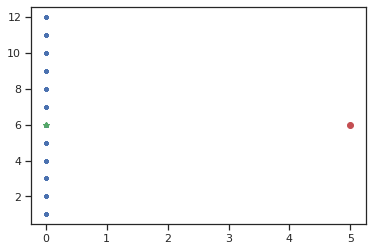

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

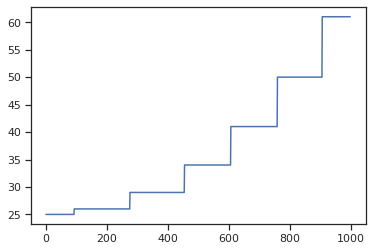

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


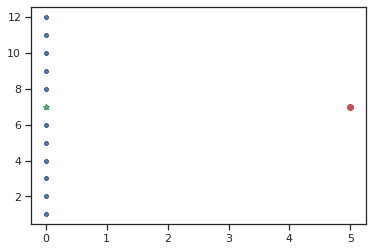

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

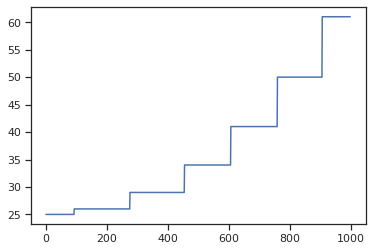

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


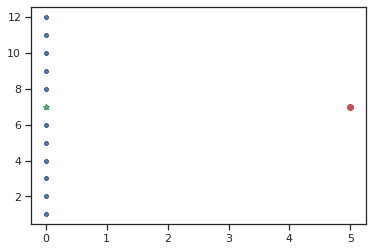

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

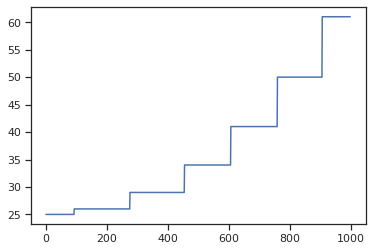

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


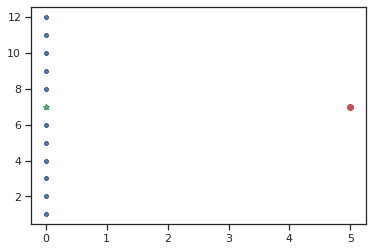

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

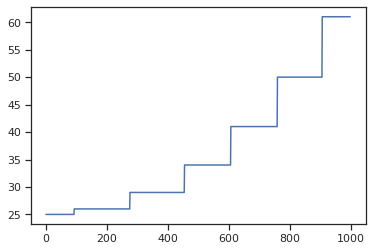

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


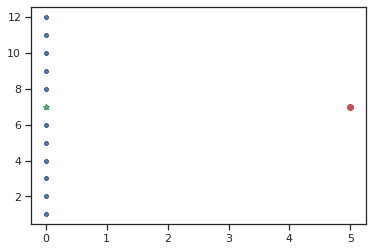

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

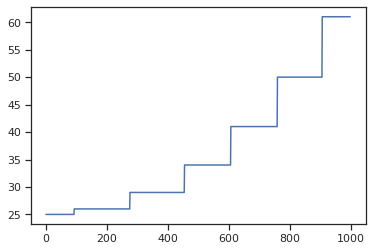

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


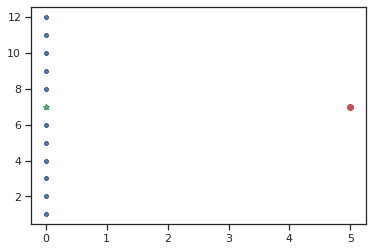

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

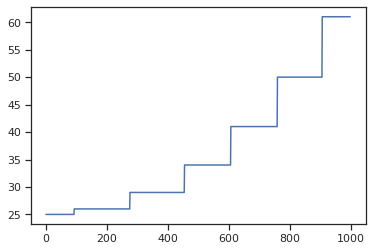

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


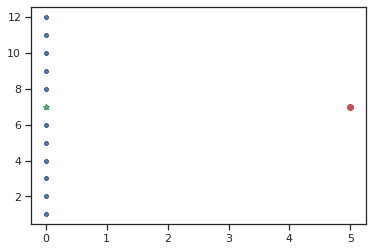

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

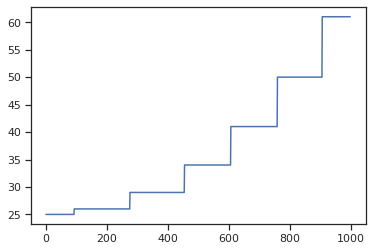

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


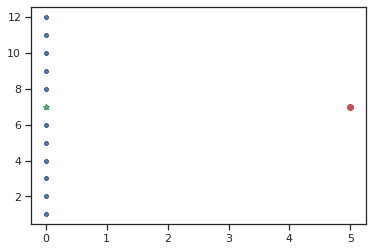

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

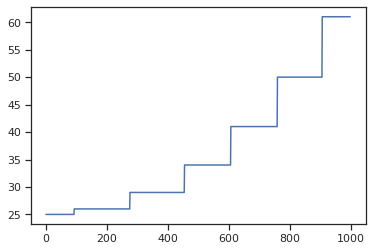

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


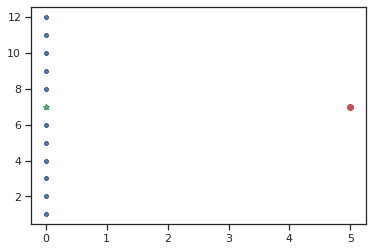

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

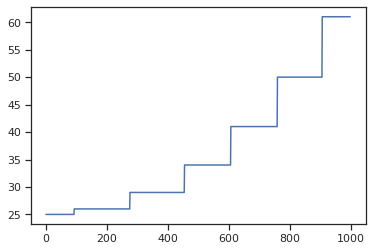

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


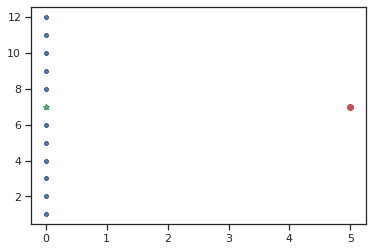

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

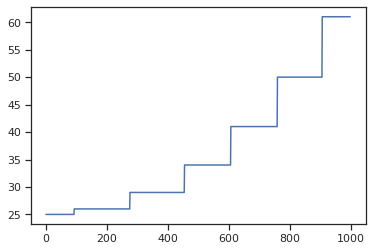

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


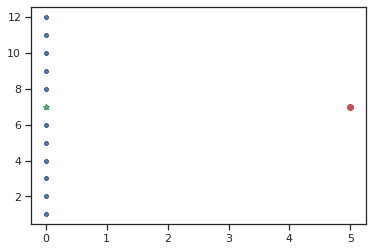

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

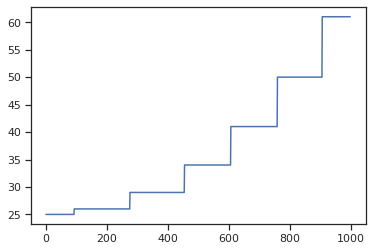

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


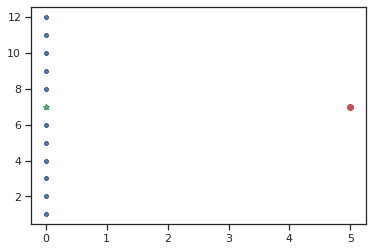

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

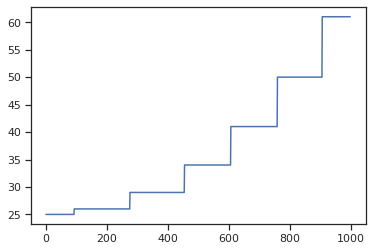

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


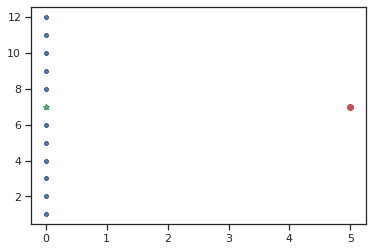

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

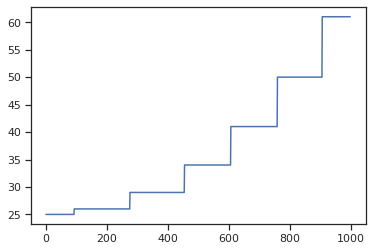

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


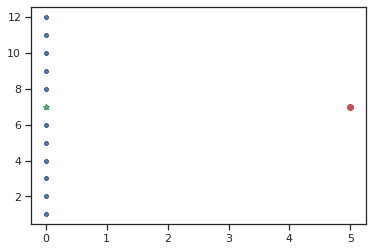

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

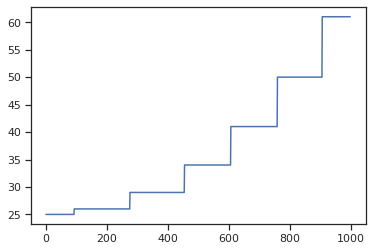

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


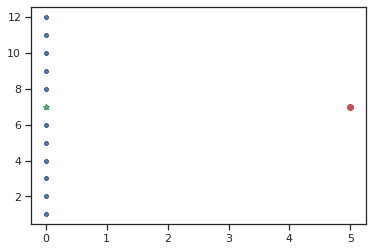

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

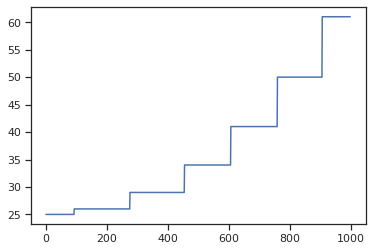

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


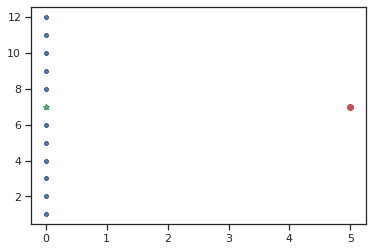

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

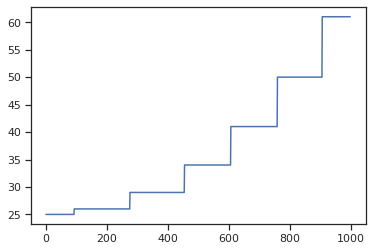

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


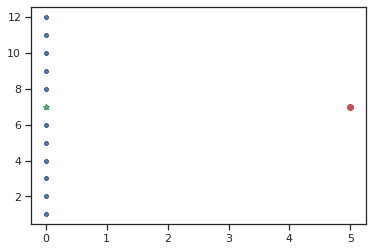

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

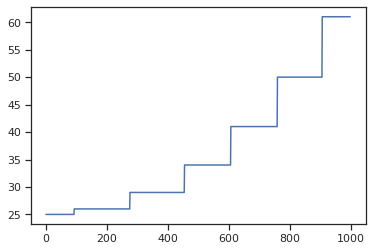

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


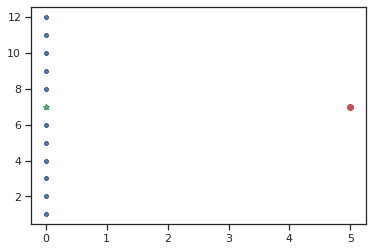

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

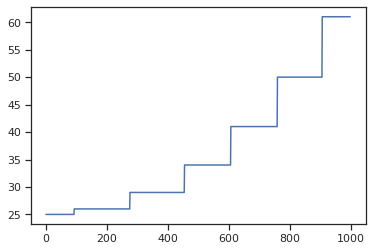

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


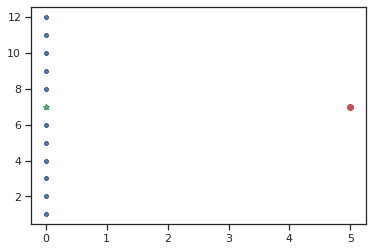

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

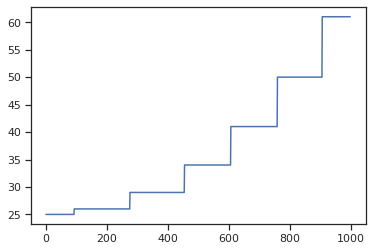

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


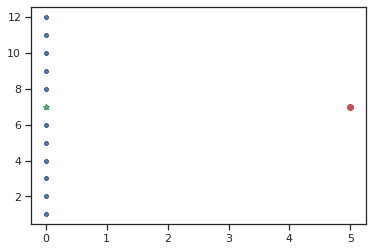

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

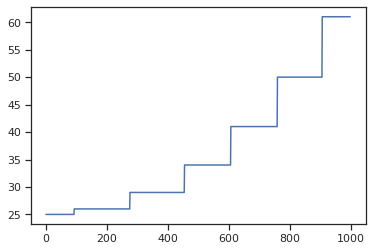

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


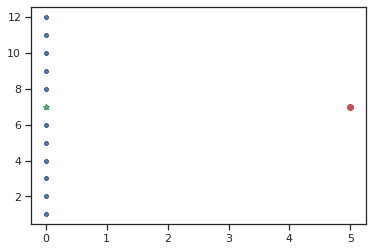

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

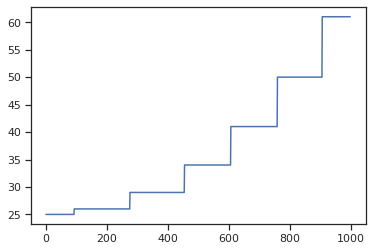

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


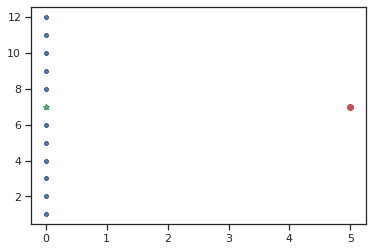

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

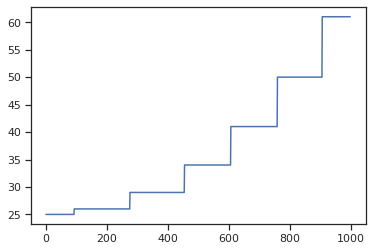

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


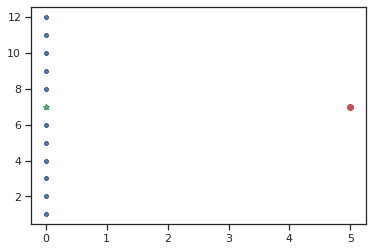

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

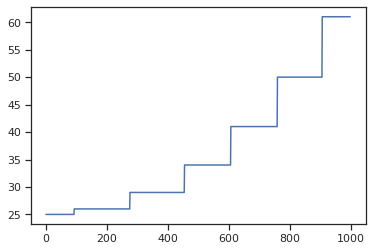

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


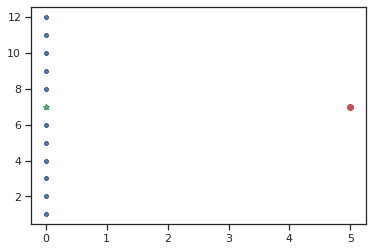

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

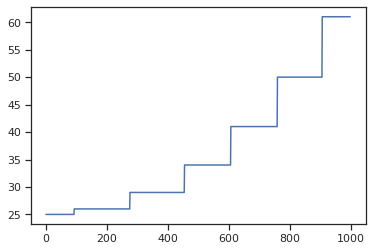

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


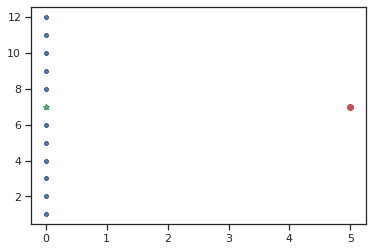

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

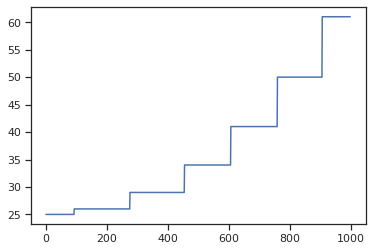

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


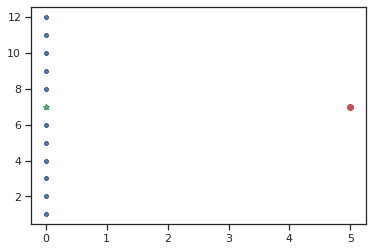

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

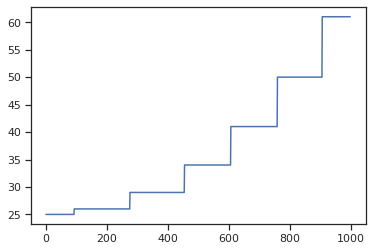

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


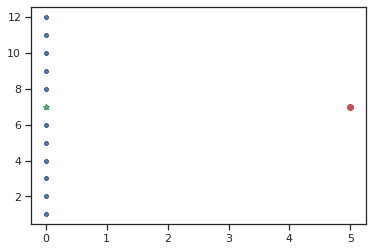

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

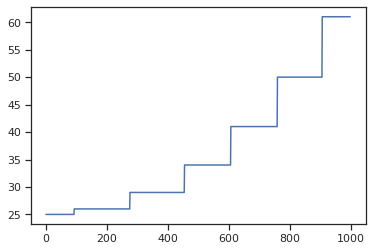

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


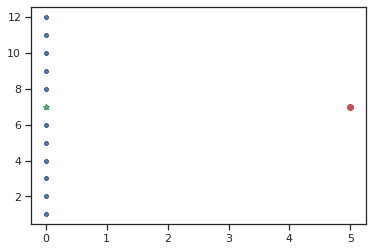

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

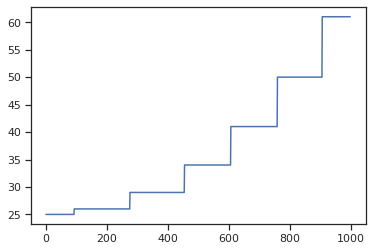

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


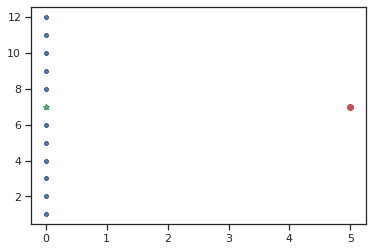

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

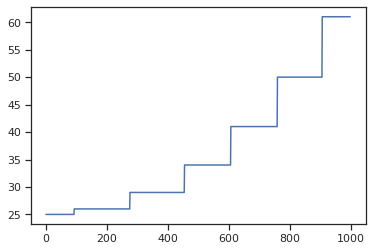

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


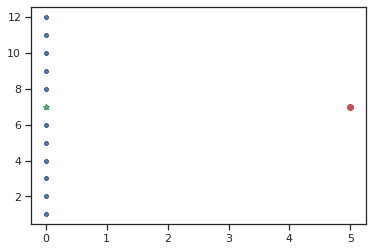

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

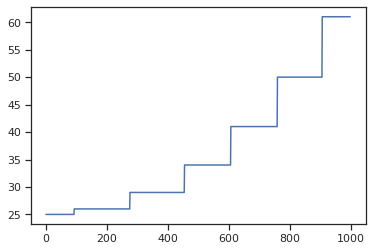

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


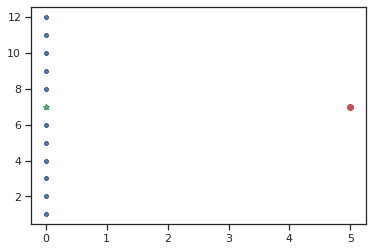

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3

**************************************
Проверяемая точка:  [5, 7]
**************************************
Вывод отсортированного списка соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, рас

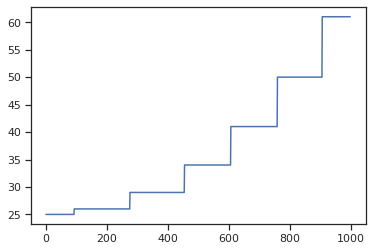

Вывод К ближайших соседей:
y=N, расстояние=25.00
y=N, расстояние=25.00
y=N, расстояние=25.00

Визуализация К ближайших соседей:


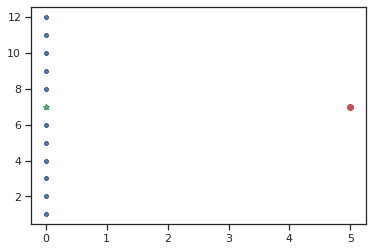

Классы, соответствующие К ближайшим соседям:
класс=N, количество элементов=3


['C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N']

In [45]:
# Для всех объектов тестовой выборки (классификация)
simple_knn_clas_prediction = simple_knn_clas.predict(K=3, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_test=data_test[['x1','x2']])
simple_knn_clas_prediction

### Оцените качество модели с помощью подходящих для задачи метрик. 

#### Метрики качества регрессии

In [47]:
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score

In [48]:
mean_absolute_error(data_test['y'], simple_knn_regr_prediction)

9.061199999999992

In [49]:
median_absolute_error(data_test['y'], simple_knn_regr_prediction)

7.479999999999997

#### Метрики качества классификации¶


In [51]:
data_test['y_clas'] = \
data_test.apply(lambda row: regr_to_class(row['y']),axis=1)

/home/mark/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
accuracy_score(data_test['y_clas'], simple_knn_clas_prediction)

0.62